In [1]:
from mpl_toolkits import mplot3d


In [2]:
%matplotlib inline
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

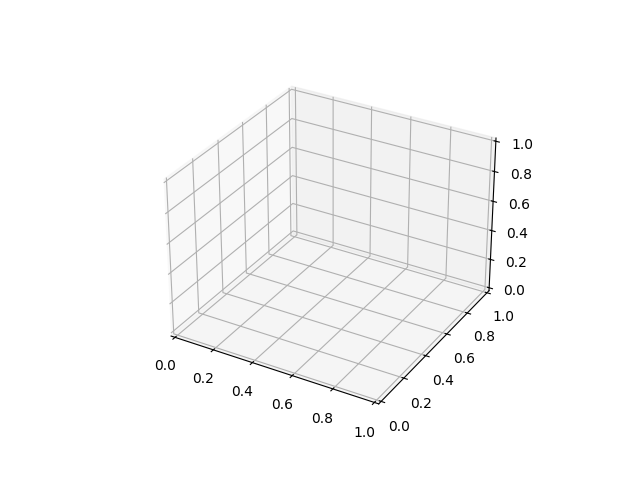

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [4]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

In [5]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5, 0, 'z')

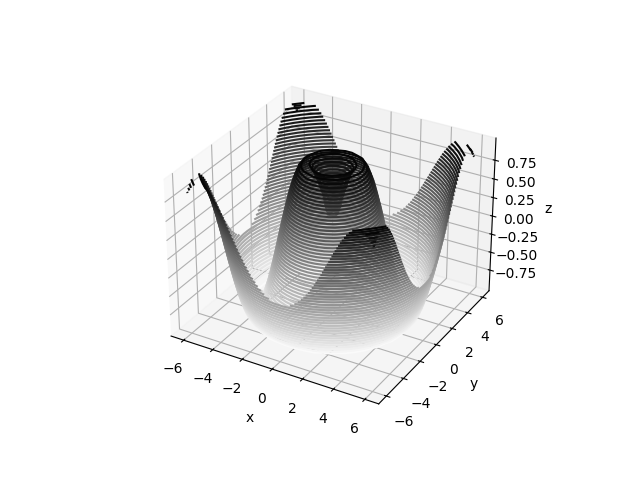

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

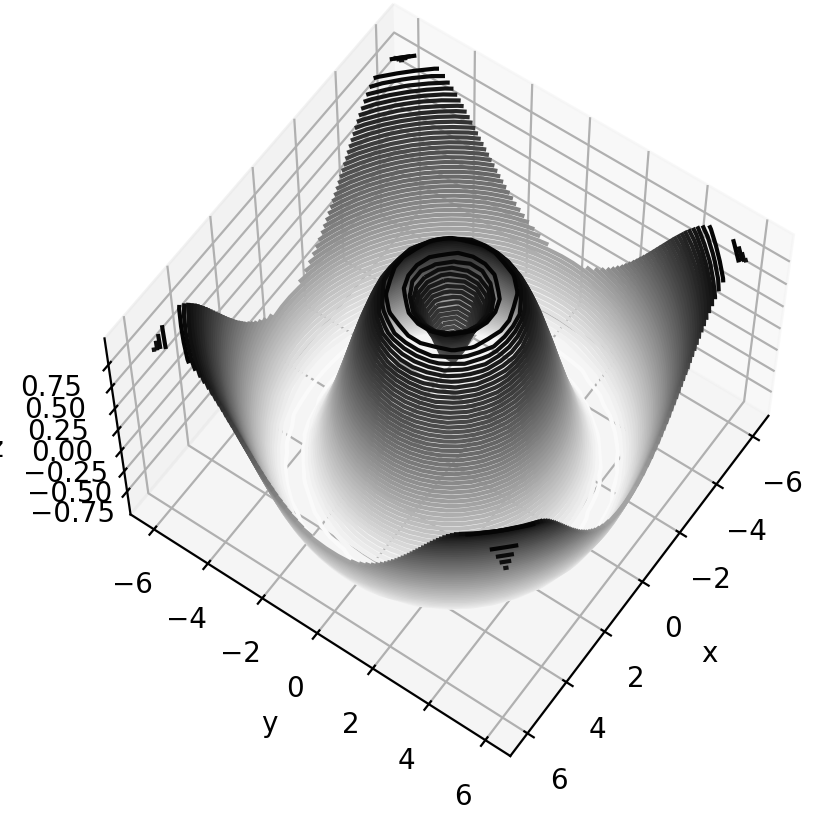

In [7]:
ax.view_init(60, 35)
fig

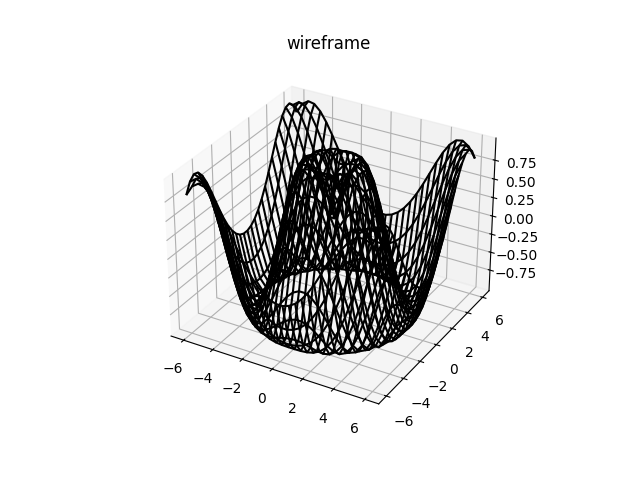

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

In [9]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [10]:
from jetblack_options.european import black_scholes_merton as bs
from jetblack_options.numeric_greeks import NumericGreeks
import pandas as pd

In [11]:
T = []
S = []
for s in range(50, 150+1, 10):
    for t in range(10, 180+1, 10):
        S.append(s)
        T.append(t)
stock_by_time = pd.DataFrame({'S': S, 'T': T})
stock_by_time

,S,T
0,50,10
1,50,20
2,50,30
3,50,40
4,50,50
...,...,...
193,150,140
194,150,150
195,150,160
196,150,170


In [12]:
is_call = True
K = 100
r = 0.1
q = 0.08
b = r - q
v = 0.125
stock_by_time['price'] = stock_by_time.apply(lambda s: bs.price(is_call, s['S'], K, s['T'] / 365, r, b, v), axis=1)
stock_by_time['delta'] = stock_by_time.apply(lambda s: bs.delta(is_call, s['S'], K, s['T'] / 365, r, b, v), axis=1)
stock_by_time['gamma'] = stock_by_time.apply(lambda s: bs.gamma(s['S'], K, s['T'] / 365, r, b, v), axis=1)
stock_by_time['theta'] = stock_by_time.apply(lambda s: bs.theta(is_call, s['S'], K, s['T'] / 365, r, b, v), axis=1)
stock_by_time['vega'] = stock_by_time.apply(lambda s: bs.vega(s['S'], 100.0, s['T'] / 365, 0.1, 0.02, 0.125), axis=1)
stock_by_time['rho'] = stock_by_time.apply(lambda s: bs.rho(True,s['S'], 100.0, s['T'] / 365, 0.1, 0.02, 0.125), axis=1)
stock_by_time

,S,T,price,delta,gamma,theta,vega,rho
0,50,10,0.000000,0.000000,2.559241e-244,-4.998517e-243,2.191131e-243,0.000000
1,50,20,0.000000,0.000000,1.296212e-122,-2.531663e-121,2.219540e-121,0.000000
2,50,30,0.000000,0.000000,4.386915e-82,-8.568194e-81,1.126776e-80,0.000000
3,50,40,0.000000,0.000000,7.723803e-62,-1.508555e-60,2.645138e-60,0.000000
4,50,50,0.000000,0.000000,1.056239e-49,-2.062968e-48,4.521573e-48,0.000000
...,...,...,...,...,...,...,...,...
193,150,140,49.230149,0.969781,1.771716e-08,2.013669e+00,1.911269e-05,36.912824
194,150,150,49.174968,0.967658,4.258727e-08,2.014516e+00,4.922330e-05,39.441245
195,150,160,49.119765,0.965539,9.151525e-08,2.015343e+00,1.128270e-04,41.955548
196,150,170,49.064539,0.963425,1.793402e-07,2.016148e+00,2.349234e-04,44.455790


TypeError: Axes3D.plot_wireframe() missing 2 required positional arguments: 'Y' and 'Z'

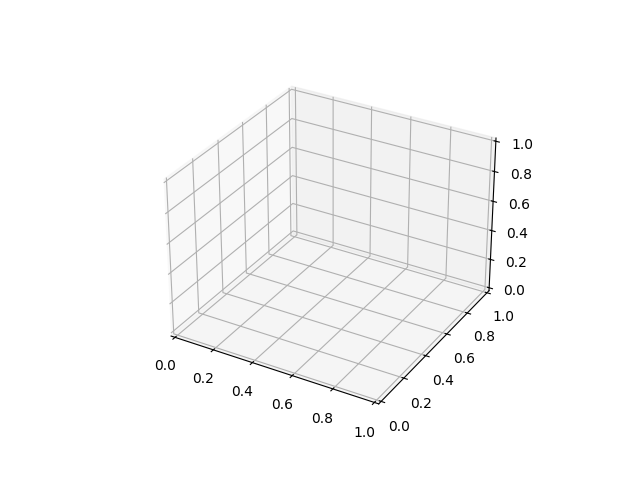

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(stock_by_time[['S', 'T', 'price']], color='black')
ax.set_title('wireframe');

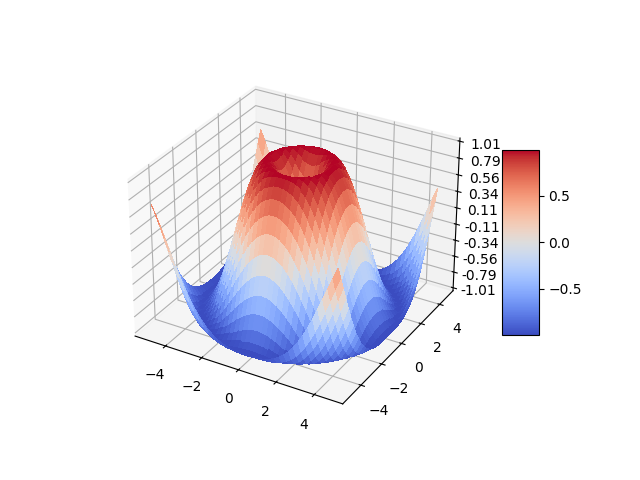

In [17]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [22]:
from mpl_toolkits.mplot3d import axes3d
X, Y, Z = axes3d.get_test_data(0.05)


In [25]:
Z

array([[-0.00982064, -0.0113957 , -0.01319036, ..., -0.01522953,
        -0.01319036, -0.0113957 ],
       [-0.0113957 , -0.01322338, -0.01530587, ..., -0.01767209,
        -0.01530587, -0.01322338],
       [-0.01319036, -0.01530587, -0.01771632, ..., -0.02045518,
        -0.01771632, -0.01530587],
       ...,
       [-0.01200234, -0.01414685, -0.01660867, ...,  0.02918791,
         0.03019517,  0.03085725],
       [-0.01097235, -0.01288301, -0.01507265, ...,  0.01583738,
         0.01709512,  0.01804782],
       [-0.00988645, -0.01157475, -0.01350698, ...,  0.00702321,
         0.0083816 ,  0.00947216]])